In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [2]:
def sorting(a, b, d, e):
    c = list()
    for i in range(len(a)): 
        c.append([a[i], b[i], d[i], e[i]])
    c = sorted(c)
    a, b, d, e = list(), list(), list(), list()
    for i in range(len(c)): 
        a.append(c[i][0])
        b.append(c[i][1])
        d.append(c[i][2])
        e.append(c[i][3])
    return a, b, d, e

In [3]:
d = pickle.load(open('mnistexp/opu_10.0ksamples_5trials_optim.pkl', 'rb'))
d.keys()
ns1 = list(d.keys())

d = pickle.load(open('mnistexp/opu_10.0ksamples_5trials.pkl', 'rb'))
d.keys()
ns2 = list(d.keys())

d = pickle.load(open('mnistexp/synthopu_10ksamples_5trials_dense.pkl', 'rb'))
d.keys()
ns3 = list(d.keys())

In [4]:
def data_taker(ns, d):

    train_mean, train_plus, train_minus = [], [], []
    test_mean, test_plus, test_minus = [], [], []
    for n in ns:
        train = d[n][0.0]['train']
        train_mu = np.mean(train)
        train_std = np.std(train)
        train_mean.append(train_mu)
        train_plus.append(train_mu + train_std)
        train_minus.append(train_mu - train_std)

        test = d[n][0.0]['test']
        test_mu = np.mean(test)
        test_std = np.std(test)
        test_mean.append(test_mu)
        test_plus.append(test_mu + test_std)
        test_minus.append(test_mu - test_std)

    x = ns 
    _, train_mean, train_plus, train_minus = sorting(x, train_mean, train_plus, train_minus)
    ns, test_mean, test_plus, test_minus = sorting(x, test_mean, test_plus, test_minus)
    
    return ns, train_mean, train_plus, train_minus, test_mean, test_plus, test_minus

def plotter(ns, train_mean, train_plus, train_minus, test_mean, test_plus, test_minus, label1, label2):
     

    plt.plot(ns, 1-np.asarray(train_mean), marker="o",  label=label1)
    plt.plot(ns, 1-np.asarray(test_mean), marker="o", label=label2)
    plt.yticks(np.arange(0, 11)/10)

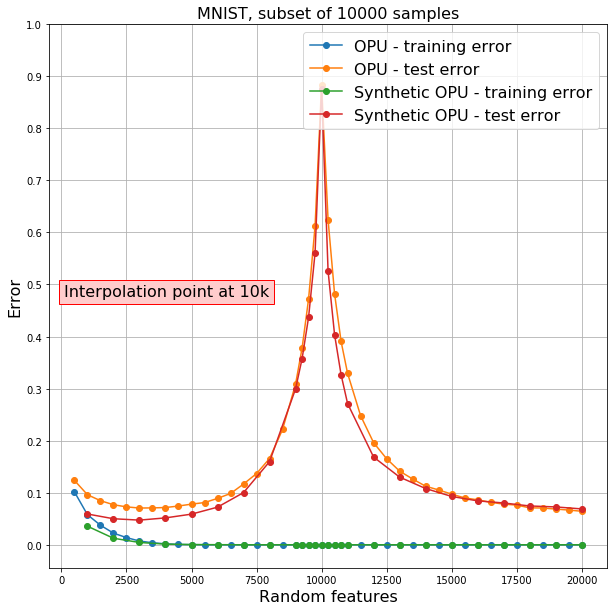

In [5]:
plt.figure(figsize=(10, 10))

d = pickle.load(open('mnistexp/opu_10.0ksamples_5trials_ae.pkl', 'rb')) 
d.keys()
ns = list(d.keys())
plotter(*data_taker(ns, d), 'OPU - training error', 'OPU - test error')

d = pickle.load(open('mnistexp/synthopu_10ksamples_5trials_dense.pkl', 'rb')) 
d.keys()
ns = list(d.keys())
plotter(*data_taker(ns, d), 'Synthetic OPU - training error', 'Synthetic OPU - test error')

plt.xlabel('Random features', fontsize='16')
plt.ylabel('Error', fontsize='16')
plt.title('MNIST, subset of 10000 samples', fontsize='16')
plt.grid()
plt.legend(fontsize='16')

plt.text(8000, 0.5, "Interpolation point at 10k", fontsize=16, ha="right", va="top", 
             bbox=dict(boxstyle="square", ec=(1., 0.0, 0.0), fc=(1.0, 0.8, 0.8),))

# plt.savefig("mnist_ddc.png", format='png')
plt.show()


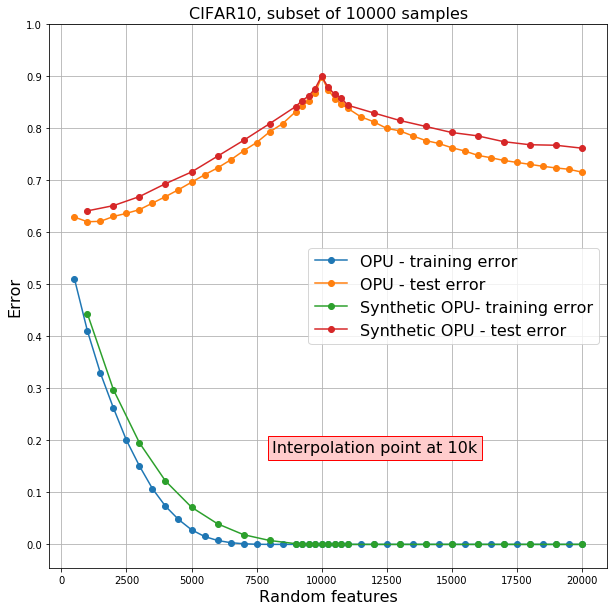

In [6]:
plt.figure( figsize=(10, 10) )

d = pickle.load(open('mnistexp/opu_10.0ksamples_5trials_cifar10_ae.pkl', 'rb')) 
d.keys()
ns = list(d.keys())
plotter(*data_taker(ns, d), 'OPU - training error', 'OPU - test error')

d = pickle.load(open('mnistexp/synthopu_10ksamples_5trials_dense_cifar10.pkl', 'rb')) 
d.keys()
ns = list(d.keys())
plotter(*data_taker(ns, d), 'Synthetic OPU- training error', 'Synthetic OPU - test error')


plt.xlabel('Random features', fontsize='16')
plt.ylabel('Error', fontsize='16')
plt.title('CIFAR10, subset of 10000 samples', fontsize='16')
plt.grid()
plt.legend(fontsize='16')

plt.text(16000, 0.2, "Interpolation point at 10k", fontsize=16, ha="right", va="top", 
             bbox=dict(boxstyle="square", ec=(1., 0.0, 0.0), fc=(1.0, 0.8, 0.8),))

# plt.savefig("cifar_ddc.png", format='png')
plt.show()